c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\diyag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


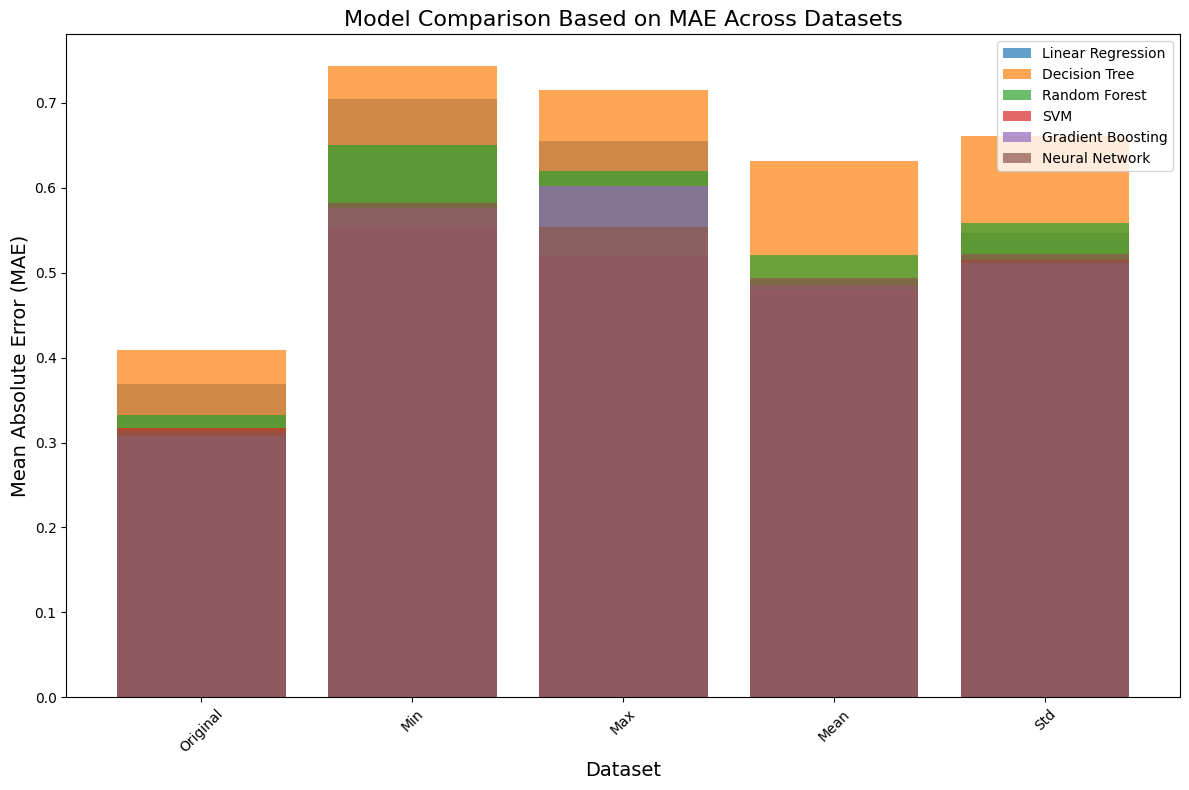

    Dataset  Linear Regression MAE  Linear Regression MSE  Linear Regression R²  Decision Tree MAE  Decision Tree MSE  Decision Tree R²  Random Forest MAE  Random Forest MSE  Random Forest R²   SVM MAE   SVM MSE    SVM R²  Gradient Boosting MAE  Gradient Boosting MSE  Gradient Boosting R²  Neural Network MAE  Neural Network MSE  Neural Network R²
0  Original               0.368698               0.205689              0.804886           0.409323           0.269841          0.744033           0.332806           0.178761          0.830430  0.317683  0.163206  0.845185               0.307777               0.153103              0.854769            0.313988            0.158199           0.849935
1       Min               0.704138               0.888937              0.144209           0.743605           1.204892         -0.159965           0.650430           0.932117          0.102639  0.552904  0.781877  0.247277               0.576238               0.754469              0.273663            0

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load all datasets
datasets = {
    'Original': pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\seattle-weather.csv'),
    'Min': pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_min.csv'),
    'Max': pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_max.csv'),
    'Mean': pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_mean.csv'),
    'Std': pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_std.csv'),
}

numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
X_cols = ['temp_min', 'precipitation', 'wind']
y_col = 'temp_max'

# Model results storage
results = []

# Model training function
def train_and_evaluate(data, dataset_name):
    # Standardize data
    scaler = StandardScaler()
    standardized_data = data.copy()
    standardized_data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
    # Split data
    X = standardized_data[X_cols].values
    y = standardized_data[y_col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
        'SVM': SVR(),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Neural Network': tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='linear')
        ])
    }
    
    # Results storage for this dataset
    dataset_results = {'Dataset': dataset_name}
    
    for model_name, model in models.items():
        if model_name == 'Neural Network':
            # Train Neural Network
            model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
            model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)
            y_pred = model.predict(X_test).flatten()
        else:
            # Train other models
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Evaluate model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        dataset_results[f'{model_name} MAE'] = mae
        dataset_results[f'{model_name} MSE'] = mse
        dataset_results[f'{model_name} R²'] = r2
    
    results.append(dataset_results)

# Train and evaluate models on all datasets
for dataset_name, dataset in datasets.items():
    train_and_evaluate(dataset, dataset_name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize results using a bar chart for MAE comparison
plt.figure(figsize=(12, 8))
for model_name in ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Neural Network']:
    plt.bar(results_df['Dataset'], results_df[f'{model_name} MAE'], label=model_name, alpha=0.7)

plt.title('Model Comparison Based on MAE Across Datasets', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Set pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Increase display width

# Display the full DataFrame
print(results_df)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
max_results = pd.read_csv(r"C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_max.csv")
min_results = pd.read_csv(r"C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_min.csv")
mean_results = pd.read_csv(r"C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_mean.csv")
stddev_results = pd.read_csv(r"C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_std.csv")
org_results=pd.read_csv(r"C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\seattle-weather.csv")

# Add a column to identify preprocessing type
max_results['Preprocessing'] = 'Max'
min_results['Preprocessing'] = 'Min'
mean_results['Preprocessing'] = 'Mean'
stddev_results['Preprocessing'] = 'Standard Deviation'
org_results['Preprocessing']= 'Original'
# Combine all results into one DataFrame
all_results = pd.concat([max_results, min_results, mean_results, stddev_results,org_results], ignore_index=True)


In [11]:
print(all_results.info())
print(all_results.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6521 non-null   object 
 1   precipitation  7305 non-null   float64
 2   temp_max       7305 non-null   float64
 3   temp_min       7305 non-null   float64
 4   wind           7305 non-null   float64
 5   weather        6605 non-null   object 
 6   Preprocessing  7305 non-null   object 
dtypes: float64(4), object(3)
memory usage: 399.6+ KB
None
         date  precipitation  temp_max  temp_min  wind  weather Preprocessing
0         NaN           55.9      12.8       5.0   4.7  drizzle           Max
1  2012-01-02           10.9      35.6       2.8   4.5     rain           Max
2  2012-01-03            0.8      11.7       7.2   2.3      NaN           Max
3  2012-01-04           20.3      12.2       5.6   4.7     rain           Max
4         NaN            1.3       8.9       2.8 

In [13]:
print(all_results.isnull().sum())  # Count missing values


date             784
precipitation      0
temp_max           0
temp_min           0
wind               0
weather          700
Preprocessing      0
dtype: int64


In [22]:
# Rename columns to match expected names
all_results.rename(columns={"accuracy": "Accuracy", "model": "Model", "preprocessing": "Preprocessing"}, inplace=True)
print(all_results.columns)

plt.figure(figsize=(14, 8))
sns.barplot(x="algorithm", y="score", hue="scaling", data=all_results, palette="viridis")
plt.title("Accuracy Comparison Across Preprocessing Methods")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(title="Preprocessing Method")
plt.show()


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'Preprocessing'], dtype='object')


ValueError: Could not interpret value `algorithm` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x800 with 0 Axes>

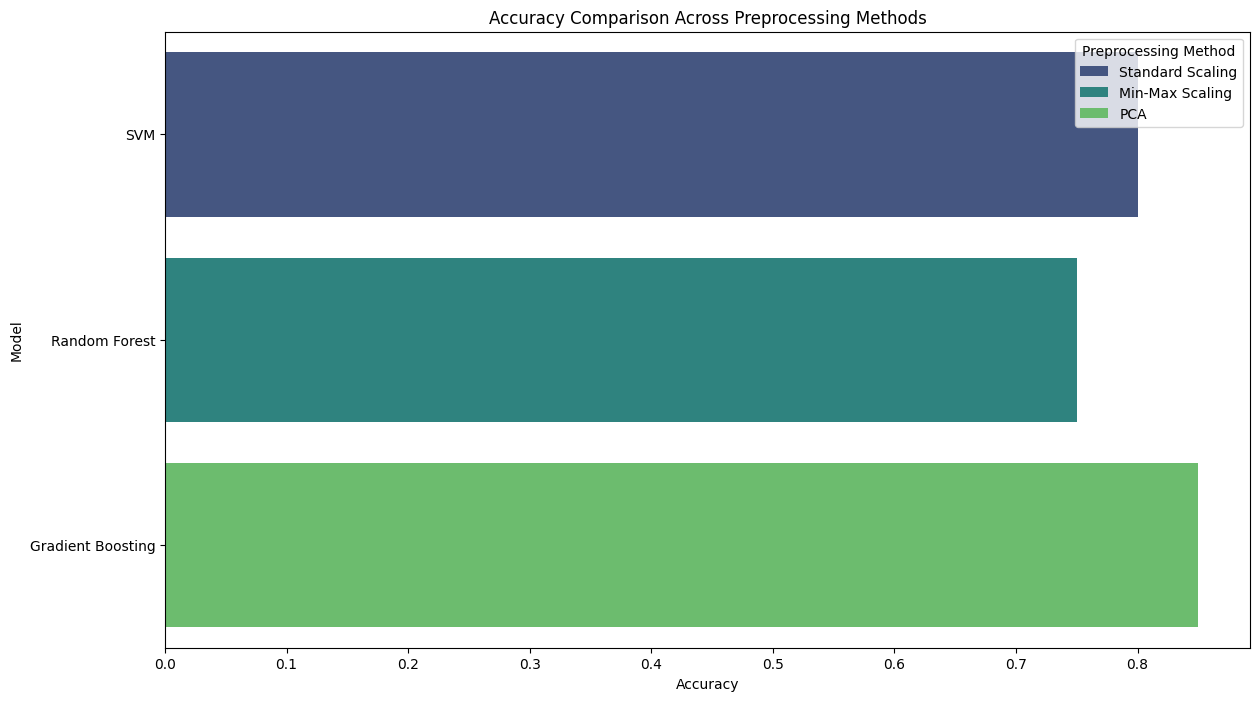

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    "Accuracy": [0.8, 0.75, 0.85],
    "Model": ["SVM", "Random Forest", "Gradient Boosting"],
    "Preprocessing": ["Standard Scaling", "Min-Max Scaling", "PCA"]
}
all_results = pd.DataFrame(data)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Accuracy", y="Model", hue="Preprocessing", data=all_results, palette="viridis")
plt.title("Accuracy Comparison Across Preprocessing Methods")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.legend(title="Preprocessing Method")
plt.show()
